# Pesticide Imports

In [1]:
import pandas as pd
import numpy as np
# put Python code to load the raw data
df_pesticide_imports = pd.read_csv("../Raw Data/Pesticide Imports.csv")

# print(df_pesticide_imports)

#column names: country: Area, Year: Year, quantity: Value 

In [23]:
#clean data pesticide imports 1961 to 2021///1990 to 2019

#filter year
df_cleaner_pestimport = df_pesticide_imports.loc[(df_pesticide_imports.Year >=1990) & (df_pesticide_imports.Year <=2019)]

#filter countries
countries = ["Thailand", "Viet Nam", "China, mainland", "India"]
df_cleaner_pestimport = df_cleaner_pestimport[df_cleaner_pestimport.Area.isin(countries)]
df_cleaner_pestimport.reset_index(inplace = True, drop = True)


#make columns for year
df_pest = pd.DataFrame()
df_pest["Year"] = df_cleaner_pestimport["Year"].unique()

#make columns with amount of fertiliser use for each country 
for country in countries:
    country_data = df_cleaner_pestimport[df_cleaner_pestimport.Area == country].reset_index()
    country_data =country_data.Value
    df_pest[country] = country_data

df_pest = df_pest.sort_values("Year")
#print(df_pest)

#rename vietnam and china
df_pest = df_pest.rename(columns={"Viet Nam": "Vietnam", "China, mainland": "China"})
df_pest

,Year,Thailand,Vietnam,China,India
0,1990,30970.1110,5320.7951,28507.6160,2481.8950
1,1991,25481.6600,5320.7951,32098.7310,1810.3800
2,1992,26188.9620,9824.7104,39304.3090,1548.2050
3,1993,25164.4760,14328.6256,24060.6580,1732.2450
4,1994,30047.7360,18832.5409,32019.8000,4259.4530
5,1995,32344.2560,23336.4562,34712.5440,4930.4190
6,1996,42644.3700,27840.3714,32110.4480,5731.3790
7,1997,42604.9500,32344.2867,48583.8120,3639.5900
8,1998,32544.7270,43582.5753,44172.9920,5056.6880
9,1999,51344.1990,39287.7087,47713.6460,5379.0550


In [24]:
#divide pesticide imports by cropland
df_cropland = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_cropland.csv")


df_pesticide = pd.DataFrame()
df_pesticide["Year"] = df_pest["Year"]
#INDIA- CONVERT TO NP ARRAY THEN CHANGE TO DF
india_nparray = np.divide(df_pest["India"].to_numpy(),df_cropland["India Crop Land"].to_numpy())
df_i = pd.DataFrame(india_nparray)
df_pesticide["India"] = df_i
#CHINA 
china_nparray = np.divide(df_pest["China"].to_numpy(),df_cropland["China Crop Land"].to_numpy())
df_c = pd.DataFrame(china_nparray)
df_pesticide["China"] = df_c
#Thailand
thailand_nparray = np.divide(df_pest["Thailand"].to_numpy(),df_cropland["Thailand Crop Land"].to_numpy())
df_t = pd.DataFrame(thailand_nparray)
df_pesticide["Thailand"] = df_t
#Vietnam
vietnam_nparray = np.divide(df_pest["Vietnam"].to_numpy(),df_cropland["Vietnam Crop Land"].to_numpy())
df_v = pd.DataFrame(vietnam_nparray)
df_pesticide["Vietnam"] = df_v
df_pesticide

,Year,India,China,Thailand,Vietnam
0,1990,0.014590,0.215645,1.503185,0.833458
1,1991,0.010638,0.240862,1.229454,0.828139
2,1992,0.009107,0.298704,1.272915,1.467032
3,1993,0.010173,0.183835,1.230838,2.119933
4,1994,0.025008,0.244652,1.463031,2.764613
5,1995,0.029018,0.265224,1.567750,3.456741
6,1996,0.033808,0.245271,2.057729,3.974925
7,1997,0.021397,0.371123,2.046642,4.491015
8,1998,0.029740,0.337444,1.556494,5.879209
9,1999,0.031618,0.364502,2.444729,5.055682


In [25]:
###Creates a csv file from the dataframe
#df_pesticide.to_csv('df_pesticide_imports.csv', index=False)

In [26]:
# descriptive statistics
df_pesticide.describe()

,Year,India,China,Thailand,Vietnam
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,0.211854,0.382957,4.610978,6.996978
std,8.803408,0.225834,0.176286,2.851421,5.248653
min,1990.000000,0.009107,0.183835,1.229454,0.828139
25%,1997.250000,0.030210,0.249282,2.049414,3.550236
50%,2004.500000,0.132103,0.322825,4.149510,4.993478
75%,2011.750000,0.370954,0.484164,7.240337,9.281075
max,2019.000000,0.681545,0.770731,10.084006,19.032825


In [27]:
from copy import deepcopy
#RICE YIELD
master_df: pd.DataFrame = pd.read_csv("../Raw Data/rice-yields.csv")
working_df = deepcopy(master_df)
###Drop unused columns
working_df.drop(['Code'], axis=1, inplace = True)
#rename column names
working_df.rename(columns={"Entity": "Country", "Rice | 00000027 || Yield | 005419 || tonnes per hectare": "Rice Yield"}, inplace = True)


###Get dates between 1990 and 2019.
###This is like making another copy? So we are not modifying the working_df!
working_df_dated = working_df[(working_df.Year >= 1990) & (working_df.Year <= 2019)]

###Get selected countries.
countries = ["China", "India", "Thailand", "Vietnam"]
working_df_dated_country = working_df_dated[working_df_dated.Country.isin(countries)]

working_df_dated_country.reset_index(drop = True, inplace = True)

###Finalized df for crop yields for 4 countries.
print(working_df_dated_country)

df_rice = pd.DataFrame()
df_rice["Year"] =working_df_dated_country["Year"].unique()

for country in countries:
    country_data = working_df_dated_country[working_df_dated_country.Country == country].reset_index()
    country_data =country_data["Rice Yield"]
    df_rice[country] = country_data
print(df_rice)

     Country  Year  Rice Yield
0      China  1990      5.7261
1      China  1991      5.6402
2      China  1992      5.8031
3      China  1993      5.8479
4      China  1994      5.8311
..       ...   ...         ...
115  Vietnam  2015      5.7597
116  Vietnam  2016      5.5738
117  Vietnam  2017      5.5476
118  Vietnam  2018      5.8180
119  Vietnam  2019      5.8371

[120 rows x 3 columns]
    Year   China   India  Thailand  Vietnam
0   1990  5.7261  2.6125    1.9556   3.1815
1   1991  5.6402  2.6271    2.2534   3.1133
2   1992  5.8031  2.6092    2.1745   3.3342
3   1993  5.8479  2.8303    2.0497   3.4815
4   1994  5.8311  2.8645    2.3521   3.5657
5   1995  6.0248  2.6972    2.4158   3.6898
6   1996  6.2122  2.8226    2.4098   3.7689
7   1997  6.3192  2.8457    2.3788   3.8768
8   1998  6.3662  2.8805    2.4180   4.0007
9   1999  6.3447  2.9782    2.4244   4.1018
10  2000  6.2716  2.8508    2.6128   4.2432
11  2001  6.1633  3.1158    2.8739   4.2853
12  2002  6.1890  2.6163    2.93

## Scatterplots

In [28]:
# plot each country against crop yield
#China
df_China_rice = pd.DataFrame()
df_China_rice["Year"] = df_rice["Year"]
df_China_rice["Yield"] = df_rice["China"]
df_China_rice["Pest import"] = df_pesticide["China"]

#India
df_India_rice = pd.DataFrame()
df_India_rice["Year"] = df_rice["Year"]
df_India_rice["Yield"] = df_rice["India"]
df_India_rice["Pest import"] = df_pesticide["India"]

#Thailand
df_Thai_rice = pd.DataFrame()
df_Thai_rice["Year"] = df_rice["Year"]
df_Thai_rice["Yield"] = df_rice["Thailand"]
df_Thai_rice["Pest import"] = df_pesticide["Thailand"]

#Vietnam
df_Vietnam_rice = pd.DataFrame()
df_Vietnam_rice["Year"] = df_rice["Year"]
df_Vietnam_rice["Yield"] = df_rice["Vietnam"]
df_Vietnam_rice["Pest import"] = df_pesticide["Vietnam"]

Text(0, 0.5, 'Rice Yield')

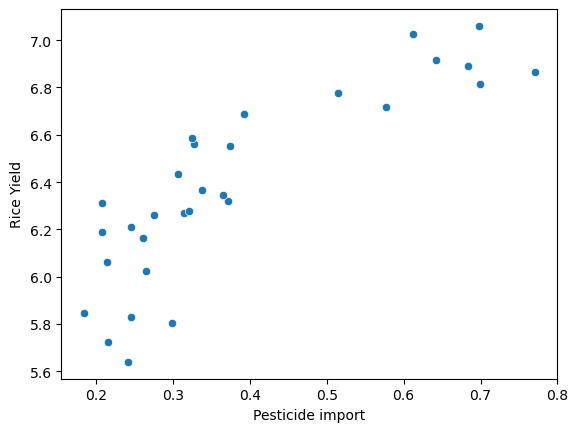

In [29]:
# visualization with analysis
#against crop yield
import seaborn as sns
#China
china_plot = sns.scatterplot(x="Pest import", y="Yield", data=df_China_rice)
china_plot.set_xlabel("Pesticide import")
china_plot.set_ylabel("Rice Yield")


Text(0, 0.5, 'Rice Yield')

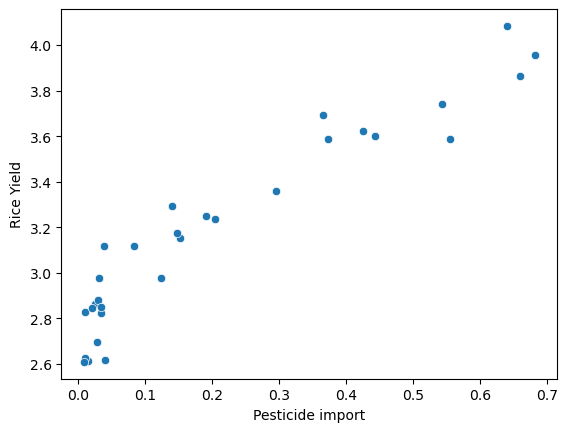

In [30]:
#India
india_plot = sns.scatterplot(x="Pest import", y = "Yield", data=df_India_rice)
india_plot.set_xlabel("Pesticide import")
india_plot.set_ylabel("Rice Yield")

Text(0, 0.5, 'Rice Yield')

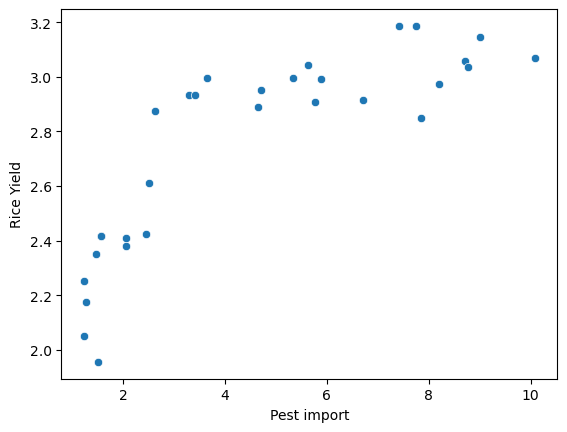

In [31]:
#thailand
thai_plot = sns.scatterplot(x="Pest import", y = "Yield", data=df_Thai_rice)
thai_plot.set_xlabel("Pest import")
thai_plot.set_ylabel("Rice Yield")

Text(0, 0.5, 'Rice Yield')

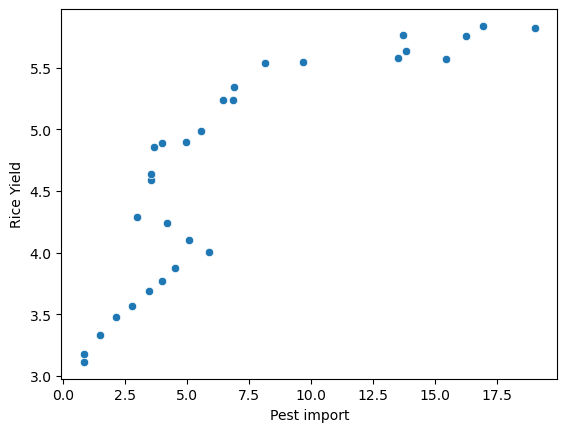

In [32]:
#vietnam
viet_plot = sns.scatterplot(x="Pest import", y = "Yield", data=df_Vietnam_rice)
viet_plot.set_xlabel("Pest import")
viet_plot.set_ylabel("Rice Yield")